In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import re
import sys
import os

sys.path.append("/home/kalmar/Mathematics/Research/MPI Tuebingen/Dionysus-python3/build/bindings/python")
import dionysus

%reload_ext autoreload
%autoreload 2

from TDA import *
tsp = __import__("topology-summary-plotter")

/usr/lib/python3.5/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
initial_dir = os.getcwd()
os.chdir("./sampled-2000/pair0001")
x = tsp.PairTopologyPlotter("knn")
os.chdir(initial_dir)

In [3]:
x.diagrams[0]

{'x_filtration_H0': [[0.0032405584340735594, 0.006481116868146897]],
 'x_inv_filtration_H0': [[2.2910748128899137, 2.900299798495718],
  [4.267815457674705, 4.34882941852654]],
 'y_filtration_H0': [[0.44345326157750886, 0.9608154000846021],
  [1.625995292450865, 1.6999041693804502]],
 'y_inv_filtration_H0': [[5.469256892789272, 5.838801277437196]]}

In [4]:
x.extrema[10]

{'maxima': [2.8868887947958277, 2.325140269522602],
 'minima': [-1.135348506035613, -2.9758711921007794]}

In [5]:
for j in range(len(x.diagrams)):
    for key, value in x.diagrams[j].items():
        for i in x.diagrams[j][key]:
            birth = i[0]
            death = i[1]
            if death < birth:
                print(j, key, i)

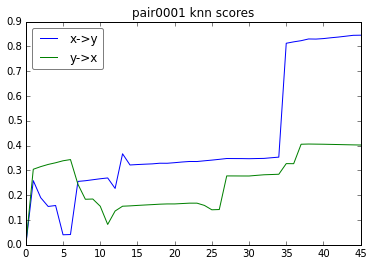

In [6]:
x.plot_scores()

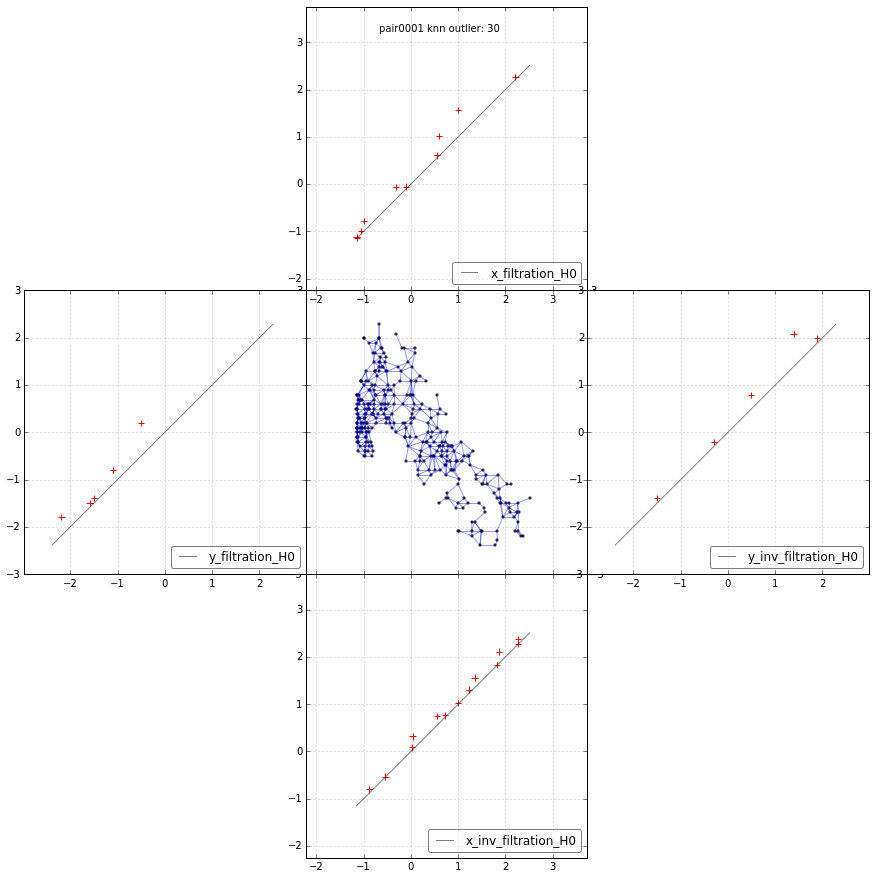

In [7]:
x.plot_all_diagrams(30, size=(12,12))

(-1.5, 3.0)
(-3.0, 3.0)


/usr/lib/python3.5/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


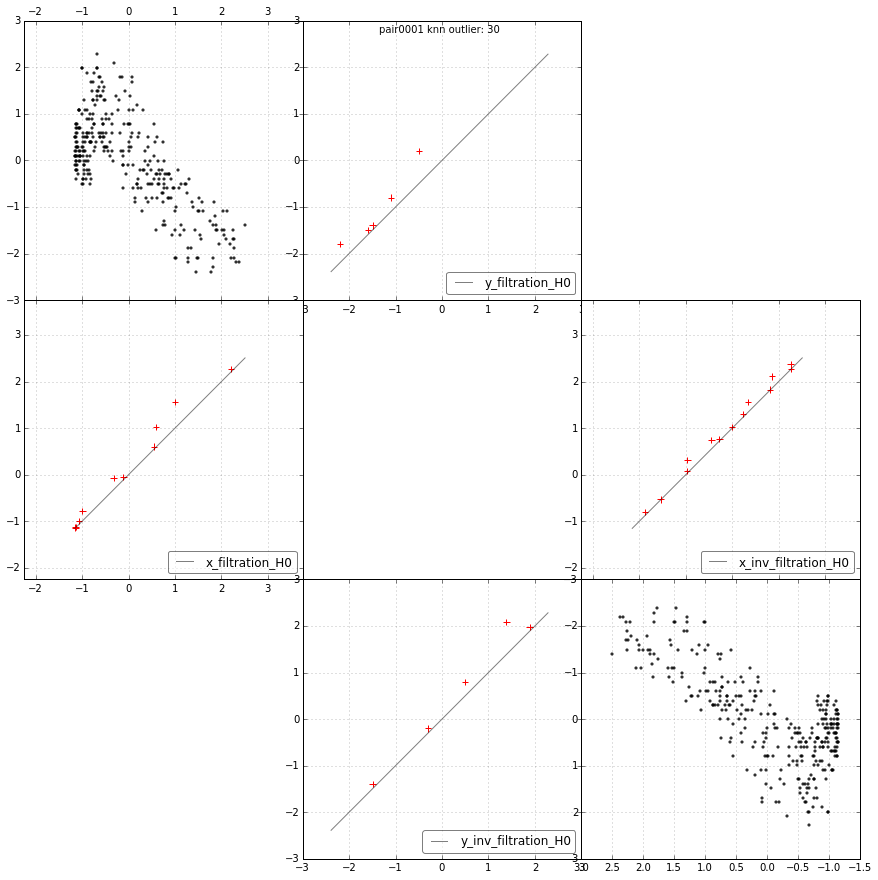

In [9]:
x.plot_all_diagrams2(30, size=(12,12))

In [ ]:
from IPython.html.widgets import widget, interact, interactive, fixed, FloatSlider, Dropdown
from matplotlib.patches import Rectangle

def real_edges_from_simplicial(edges, points):
    """Computes the edges of alpha-filtration; returns list ready to supply to LineCollection
    i.e. list of tuples ((begin_x,begin_y), (end_x,end_y))"""
    lines = []
    for edge in edges:
        begin = points[edge[0]]
        end = points[edge[1]]
        lines.append((list(begin),list(end)))
    return lines

def real_triangles_from_simplicial(triangles, points):
    """Computes the edges of alpha-filtration; returns TWO lists ready to supply to pl.fill
    i.e. give triangle ABC corresponding to P1, P2, P3 (points on plane) function returns
    px = [P1x,P2x,P3x,None,...]
    py = [P1y,P2y,P3y,None,...]
    where P1x is projection of P1 to the first axis."""
    
    tr_points = np.asarray([[points[i[0]], points[i[1]], 
                             points[i[2]], np.array([None,None])] 
                            for i in triangles]).ravel()
    #tr_points = array([P1x,P1y,P2x,P2y,P3x,P3y,None,None...])
    points_x = tr_points[::2]
    points_y = tr_points[1::2]
    
    return points_x, points_y

def sweep_filtration_plot(pair, filtration, level):
    
    plt.scatter(pair.data.points[:,0],pair.data.points[:,1], color='black', alpha=0.05)
    
    alphashape = [s for s in filtration if s.data <= level]

    vertices = [[y for y in x.vertices] for x in alphashape if x.dimension() == 0]
    edges = [[y for y in x.vertices] for x in alphashape if x.dimension() == 1]
    triangles = [[y for y in x.vertices] for x in alphashape if x.dimension() == 2]
    
    vrtcs = np.asarray([pair.data.points[x] for y in vertices for x in y])
    
    if vrtcs.any():
        plt.scatter(vrtcs[:,0],vrtcs[:,1], color='r', s = 2)
    
    ax = plt.gca()
    ax.set(aspect='equal')

    lines = real_edges_from_simplicial(edges, pair.data.points)
    if len(lines):
        ln_coll = LineCollection(lines, colors='b', alpha=0.4)
        ax.add_collection(ln_coll)

    if len(triangles) :
        px, py = real_triangles_from_simplicial(triangles, pair.data.points)
        ax.fill(px, py, facecolor='b',alpha=0.2, edgecolor='none')
        
def sweep_persistence_plot(pair, filtration, level):
    """Plots persistence diagram"""
    if filtration == pair.data.x_filtration:
        H0 = pair.persistence.H0_x 
        Inf_life_0 = pair.persistence.Inf_life_0_x
        minimal = pair.data.xmin
        maximal = pair.data.xmax
    elif filtration == pair.data.y_filtration:
        H0 = pair.persistence.H0_y
        Inf_life_0 = pair.persistence.Inf_life_0_y
        minimal = pair.data.ymin
        maximal = pair.data.ymax
    elif filtration == pair.data.x_inv_filtration:
        H0 = pair.persistence.H0_x_inv
        Inf_life_0 = pair.persistence.Inf_life_0_x_inv
        minimal = pair.data.xmin
        maximal = pair.data.xmax
    elif filtration == pair.data.y_inv_filtration:
        H0 = pair.persistence.H0_y_inv 
        Inf_life_0 = pair.persistence.Inf_life_0_y_inv
        minimal = pair.data.ymin
        maximal = pair.data.ymax
        

    if len(Inf_life_0) > 0:
        plt.scatter(Inf_life_0[:, 0], 1.05 *maximal* np.ones(len(Inf_life_0)),
                   marker='+', facecolors='none', edgecolors='r', s=100.0)
    if len(H0) > 0:
        plt.scatter(H0[:, 0], H0[:, 1],
                    marker='+', facecolors='none', edgecolors='r')
    
    plt.plot([minimal, level], [level, level], color='blue', alpha = 0.15)
    plt.plot([level, level], [level, maximal], color='blue', alpha = 0.15)
    
    ax = plt.gca()
    ax.add_patch(Rectangle((minimal, level), level, 1.05 * (maximal - level),
                           facecolor="black", alpha = 0.05))
    
    plt.plot([minimal, maximal], 
             [minimal, maximal], 
             color='black', alpha = 0.1)

def sweep_plots_vs_diagrams(pair, filtration = 'LR-filtration', level = 0):
    
    if filtration == 'LR-filtration':
        filtration = pair.data.x_filtration
        m = pair.data.xmin
        M = pair.data.xmax
        distance_to_empty = pair.persistence.LR_noninj
    elif filtration == 'RL-filtration':
        filtration = pair.data.x_inv_filtration
        m = pair.data.xmin
        M = pair.data.xmax
        distance_to_empty = pair.persistence.RL_noninj
    elif filtration == 'BT-filtration':
        filtration = pair.data.y_filtration
        m = pair.data.ymin
        M = pair.data.ymax
        distance_to_empty = pair.persistence.BT_noninj
    elif filtration == 'TB-filtration':
        filtration = pair.data.y_inv_filtration
        m = pair.data.ymin
        M = pair.data.ymax
        distance_to_empty = pair.persistence.TB_noninj
    
    linearisation_01 = lambda x: (M - m) * x + m
    level = linearisation_01(level)
        
        
    plt.subplot(2,2,1)
    fig = plt.gcf()
    fig.set_size_inches(13,13)    
    sweep_filtration_plot(pair, filtration, level)
    ax = plt.gca()
    ax.set(aspect='equal')

    
    plt.subplot(2,2,2)
    
    sweep_persistence_plot(pair, filtration, level)
#     plt.plot([0,1],[1,1+level])
    plt.gca().set(aspect='equal')
    plt.show()
    print(distance_to_empty)

In [ ]:
interactive(sweep_plots_vs_diagrams, 
            pair = pairs, 
            filtration = ['LR-filtration', 'RL-filtration', 'BT-filtration', 'TB-filtration'], 
            level = (0,1,0.01))

In [ ]:
len(pairs[files[0]].data.points)

In [ ]:
wrong_pairs_array = np.array([37, 22, 64, 68, 41, 12, 48, 56, 23, 87,  5, 46, 75, 45,  4, 73, 77,
       88, 76, 86, 66, 74, 78, 44, 15, 14])

wrong_files = [f for f in files if int(f[f.find('.txt')-4: f.find('.txt')]) in wrong_pairs_array] 

wrong_pairs = {f : pairs[f] for f in wrong_files}

interactive(sweep_plots_vs_diagrams, 
            pair = wrong_pairs, 
            filtration = ['LR-filtration', 'RL-filtration', 'BT-filtration', 'TB-filtration'], 
            level = (0,1,0.01))